In [14]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, roc_auc_score

In [8]:
# Charger les données
df = pd.read_csv("credit_risk_dataset.csv") 
df.head(5)

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
0,22,59000,RENT,123.0,PERSONAL,D,35000,16.02,1,0.59,Y,3
1,21,9600,OWN,5.0,EDUCATION,B,1000,11.14,0,0.10,N,2
2,25,9600,MORTGAGE,1.0,MEDICAL,C,5500,12.87,1,0.57,N,3
3,23,65500,RENT,4.0,MEDICAL,C,35000,15.23,1,0.53,N,2
4,24,54400,RENT,8.0,MEDICAL,C,35000,14.27,1,0.55,Y,4


In [9]:
# Vérification des valeurs manquantes
df.isnull().sum()

person_age                       0
person_income                    0
person_home_ownership            0
person_emp_length              895
loan_intent                      0
loan_grade                       0
loan_amnt                        0
loan_int_rate                 3116
loan_status                      0
loan_percent_income              0
cb_person_default_on_file        0
cb_person_cred_hist_length       0
dtype: int64

In [10]:
# Suppression ou imputation des valeurs manquantes
df = df.dropna() 

In [11]:
# Encodage des variables catégorielles
label_encoders = {}
for col in df.select_dtypes(include=['object']).columns:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le

# Normalisation des données
scaler = StandardScaler()
X = df.drop(columns=["loan_status"])  
y = df["loan_status"]

X_scaled = scaler.fit_transform(X)

# Division en ensembles d'entraînement et de test
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)


### 📊 Étape 2 : Analyse Exploratoire des Données (EDA)

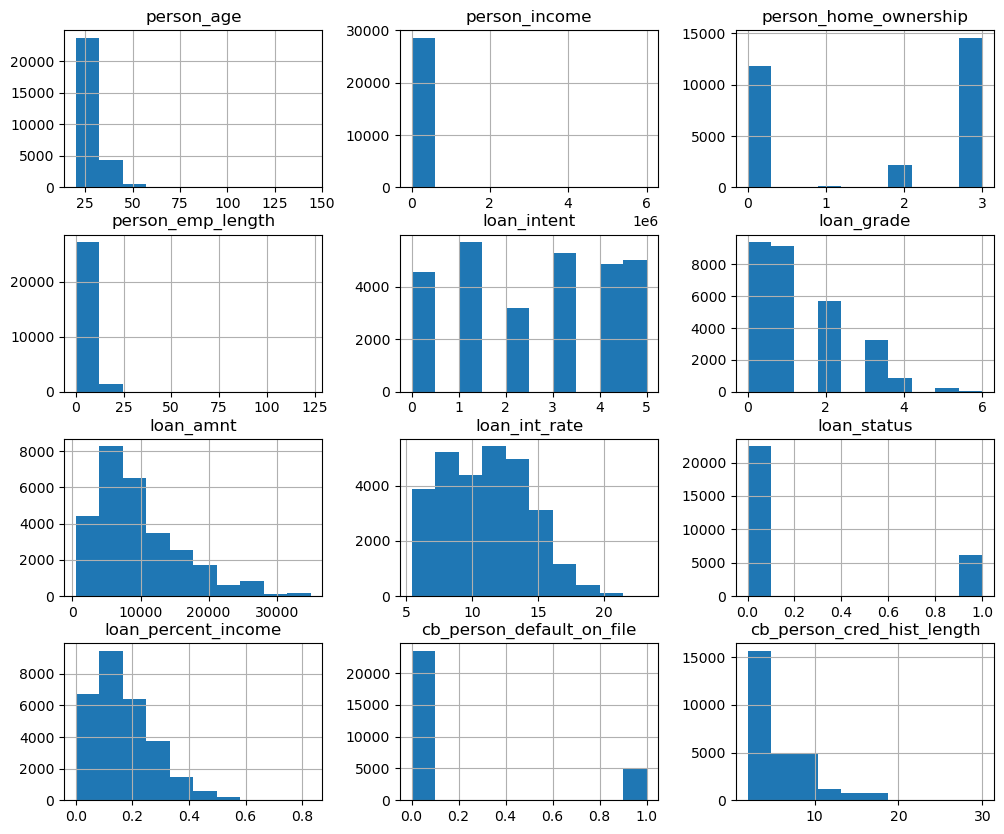

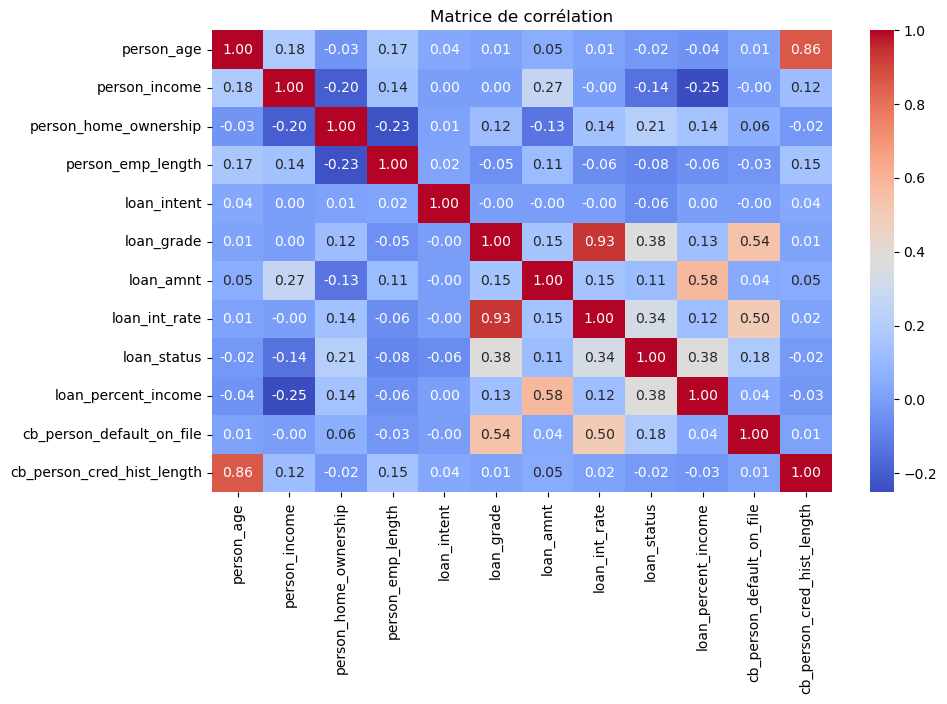

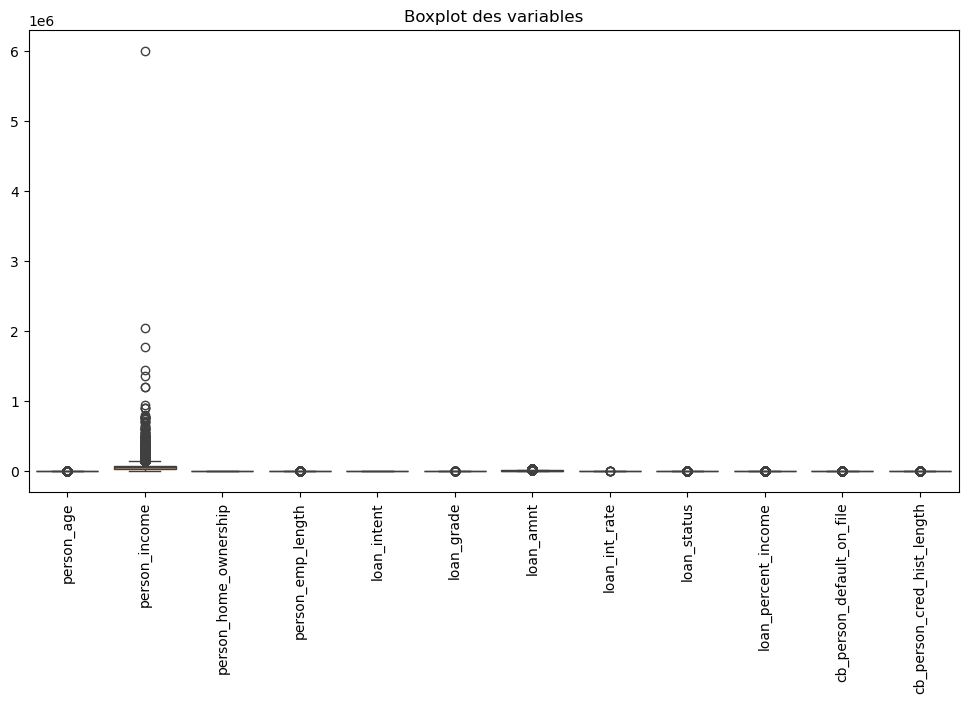

In [13]:

# Distribution des variables
df.hist(figsize=(12, 10))
plt.show()

# Matrice de corrélation
plt.figure(figsize=(10, 6))
sns.heatmap(df.corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Matrice de corrélation")
plt.show()

# Boxplots des principales variables
plt.figure(figsize=(12, 6))
sns.boxplot(data=df)
plt.xticks(rotation=90)
plt.title("Boxplot des variables")
plt.show()


### 🏗️ Étape 3 : Construction des Modèles

In [15]:
# Modèle de Régression Logistique
log_model = LogisticRegression()
log_model.fit(X_train, y_train)
y_pred_log = log_model.predict(X_test)


In [16]:
# Évaluation des modèles
print("Régression Logistique:\n", classification_report(y_test, y_pred_log))

Régression Logistique:
               precision    recall  f1-score   support

           0       0.86      0.95      0.90      4443
           1       0.73      0.45      0.56      1285

    accuracy                           0.84      5728
   macro avg       0.79      0.70      0.73      5728
weighted avg       0.83      0.84      0.82      5728



In [17]:
# Modèle d'Arbre de Décision
tree_model = DecisionTreeClassifier()
tree_model.fit(X_train, y_train)
y_pred_tree = tree_model.predict(X_test)


In [18]:
# Évaluation des modèles
print("Arbre de Décision:\n", classification_report(y_test, y_pred_tree))

Arbre de Décision:
               precision    recall  f1-score   support

           0       0.93      0.92      0.93      4443
           1       0.73      0.77      0.75      1285

    accuracy                           0.89      5728
   macro avg       0.83      0.85      0.84      5728
weighted avg       0.89      0.89      0.89      5728



In [19]:
# Comparaison des scores AUC-ROC
print("AUC-ROC Régression Logistique:", roc_auc_score(y_test, y_pred_log))
print("AUC-ROC Arbre de Décision:", roc_auc_score(y_test, y_pred_tree))


AUC-ROC Régression Logistique: 0.7008198968166599
AUC-ROC Arbre de Décision: 0.845253977970856


### 🏆 Étape 4 : Sélection du Meilleur Modèle

In [20]:
best_model = log_model if roc_auc_score(y_test, y_pred_log) > roc_auc_score(y_test, y_pred_tree) else tree_model

# Sauvegarde du modèle
import joblib
joblib.dump(best_model, "model.joblib")


['model.joblib']